In [165]:
import mediapipe as mp
import cv2
import time
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import time

# Импорт модулей mediapipe, необходимых для извлечения ключевых точек и их прорисовки
mpPose = mp.solutions.pose
pose = mpPose.Pose()
mpDraw = mp.solutions.drawing_utils # Модуль для отрисовки поз
points = mpPose.PoseLandmark # Ключевые точки позы
path_train = "DATASET/TRAIN/" # Путь к датасету
path_test = "DATASET/TEST/" # Путь к датасету

In [166]:
print('numpy',np.__version__)
print('cv2', cv2.__version__)
#print(time.__version__)
print('pandas', pd.__version__)
#print('os', os.__version__)
#print('python', python.__version__)
print('mediapipe', mp.__version__)

numpy 1.26.4
cv2 4.10.0
pandas 2.2.2
mediapipe 0.10.20


In [167]:
Key_Points_MediaPipe = ['Nose', 'LeftEyeInnerCorner', 'LeftEye', 'LefEyeOuterCorner', 
              'RightEyeInnerCorner', 'RightEye', 'RightEyeOuterCorner',
              'LeftEar', 'RightEar', 'MouthLeftCorner', 'MouthRightCorner', 'LeftShoulder', 'RightShoulder',
              'LeftElbow', 'RightElbow', 'LeftWrist', 'RightWrist', 'LeftLittleFinger', 'RightLittleFinger',
              'LeftIndexFinger', 'RightIndexFinger', 'LeftThumb', 'RightThumb', 
              'LeftHip', 'RightHip', 'LeftKnee', 'RightKnee', 'LeftAnkle', 'RightAnkle',
              'LeftHeel', 'RightHeel', 'TheIndexFingerOfTheLeftFoot', 'TheIndexFingerOfTheRightFoot'
]

In [168]:
 # Создание пустого датафрейма для последующего сохраниения ключевых точек
def init_data(Key_Points, full = True):
    data = []
    data.append("FileName")
    i = 0
    for p in points:
        x = Key_Points[i]
        data.append(x + "_x")
        data.append(x + "_y")
        if full:
            data.append(x + "_z")
            data.append(x + "_vis")
        i += 1
    data.append("target")
    #data.append("name_file")
    data = pd.DataFrame(columns = data) 
    return data

In [172]:
# Создание датасета каркасных моделей (набора ключевых точек и метки - названия позы)
def create_df_pos(path, name_file, full = True):
    data = init_data(Key_Points_MediaPipe, full)
    count = 0
    target = []
    count_files = {}
    for dr in os.listdir(path): # Перебор папок с видами поз
        count_file = 0
        for image in os.listdir(path+"/"+dr): # Перебор файлов в каждой папке
            temp = []
            img = cv2.imread(path+"/"+dr + "/" + image)
            count_file+=1
            # Копирование и конвертация изображения в RGB
            imageWidth, imageHeight = img.shape[:2]
            imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Преобразование BGR модели OpenCV в RGB модель, с которой работает MediaPipe
            # Обнаружение позы            
            results = pose.process(imgRGB) # Построение скелетной модели
            if results.pose_landmarks: # Если модель построена
                landmarks = results.pose_landmarks.landmark # Извлечение ключевых точек (ориентиров)
                temp = temp + [path + dr + "/" + image]
                for i,j in zip(points,landmarks):
                    temp = temp + [j.x, j.y]
                    if full:
                        temp = temp + [j.z, j.visibility] # Добавление ключевых точек
                temp = temp + [dr] # Добавление метки
                data.loc[count] = temp # Запись в дата фрейм
                count +=1
            else:
                print(path+"/"+dr + "/" + image)
        count_files[dr] = count_file
    data.to_csv(name_file) # Запись датафрейма ключевых точек в файл
    return count_files, data

In [173]:
# Построение диаграммы распределения скелетных моделей по классам
def paint_bar(data, s):
    df = data['target'].value_counts()
    label = list(df.index)
    counts = list(df.values)
    # Построение диаграммы распределения
    plt.bar(label, counts)
    plt.title('Распределение классов поз в ' + s + ' наборе')

In [174]:
# Построение датафрейма скелетных моделей обучающего набора
time_start = time.time()
count_files, data_tr = create_df_pos(path_train, 'dataset_train_mediapipe_short.csv', full = False)
time_end = time.time()
print('time: ',time_end-time_start)
print(count_files)
data_tr.head()

DATASET/TRAIN//downdog/00000181.bmp
DATASET/TRAIN//downdog/00000187.jpg
DATASET/TRAIN//downdog/00000188.png
DATASET/TRAIN//downdog/00000203.png
DATASET/TRAIN//downdog/00000212.png
DATASET/TRAIN//downdog/00000222.jpg
DATASET/TRAIN//downdog/00000232.jpg
DATASET/TRAIN//downdog/00000239.jpg
DATASET/TRAIN//downdog/00000274.jpg
DATASET/TRAIN//downdog/00000287.png
DATASET/TRAIN//downdog/00000300.jpg
DATASET/TRAIN//downdog/00000315.jpg
DATASET/TRAIN//downdog/00000320.jpg
DATASET/TRAIN//downdog/00000322.jpg
DATASET/TRAIN//downdog/00000331.jpg
DATASET/TRAIN//downdog/00000334.jpg
DATASET/TRAIN//downdog/00000361.jpg
DATASET/TRAIN//downdog/00000367.png
DATASET/TRAIN//downdog/00000387.jpg
DATASET/TRAIN//downdog/00000420.jpg
DATASET/TRAIN//downdog/00000427.jpg
DATASET/TRAIN//goddess/00000120.jpg
DATASET/TRAIN//goddess/00000127.png
DATASET/TRAIN//goddess/00000146.jpg
DATASET/TRAIN//goddess/00000149.jpg
DATASET/TRAIN//goddess/00000165.jpg
DATASET/TRAIN//goddess/00000176.jpg
DATASET/TRAIN//goddess/00000

,FileName,Nose_x,Nose_y,LeftEyeInnerCorner_x,LeftEyeInnerCorner_y,LeftEye_x,LeftEye_y,LefEyeOuterCorner_x,LefEyeOuterCorner_y,RightEyeInnerCorner_x,...,RightAnkle_y,LeftHeel_x,LeftHeel_y,RightHeel_x,RightHeel_y,TheIndexFingerOfTheLeftFoot_x,TheIndexFingerOfTheLeftFoot_y,TheIndexFingerOfTheRightFoot_x,TheIndexFingerOfTheRightFoot_y,target
0,DATASET/TRAIN/downdog/00000128.jpg,0.440046,0.694404,0.413926,0.695591,0.411112,0.691122,0.407942,0.686202,0.414263,...,0.772217,0.947287,0.821074,0.928283,0.813564,0.825858,0.863186,0.808759,0.840944,downdog
1,DATASET/TRAIN/downdog/00000129.jpg,0.379200,0.715202,0.360621,0.705401,0.360325,0.701575,0.360246,0.697921,0.360010,...,0.810305,0.931328,0.890967,0.915636,0.878710,0.794708,0.956716,0.776649,0.925315,downdog
2,DATASET/TRAIN/downdog/00000130.jpg,0.396090,0.645451,0.371535,0.649160,0.368916,0.645190,0.366164,0.640417,0.371465,...,0.737807,0.943269,0.810736,0.917942,0.779571,0.807477,0.846006,0.801715,0.829324,downdog
3,DATASET/TRAIN/downdog/00000131.jpg,0.572191,0.562083,0.565461,0.585230,0.563659,0.584441,0.561272,0.583685,0.561887,...,0.638067,0.943854,0.702114,0.878087,0.679136,0.853683,0.742550,0.815078,0.714436,downdog
4,DATASET/TRAIN/downdog/00000132.png,0.497070,0.607126,0.472906,0.607829,0.505630,0.615210,0.531450,0.622057,0.403576,...,0.541982,0.655562,0.599263,0.248569,0.575404,0.677659,0.649825,0.193060,0.673979,downdog


In [175]:
# Вывод характеристик датафрейма скелетных моделей обучающего набора
print(data_tr.info())

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 962
Data columns (total 68 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   FileName                        963 non-null    object 
 1   Nose_x                          963 non-null    float64
 2   Nose_y                          963 non-null    float64
 3   LeftEyeInnerCorner_x            963 non-null    float64
 4   LeftEyeInnerCorner_y            963 non-null    float64
 5   LeftEye_x                       963 non-null    float64
 6   LeftEye_y                       963 non-null    float64
 7   LefEyeOuterCorner_x             963 non-null    float64
 8   LefEyeOuterCorner_y             963 non-null    float64
 9   RightEyeInnerCorner_x           963 non-null    float64
 10  RightEyeInnerCorner_y           963 non-null    float64
 11  RightEye_x                      963 non-null    float64
 12  RightEye_y                      963 non-n

target
warrior2    235
plank       226
downdog     202
goddess     160
tree        140
Name: count, dtype: int64


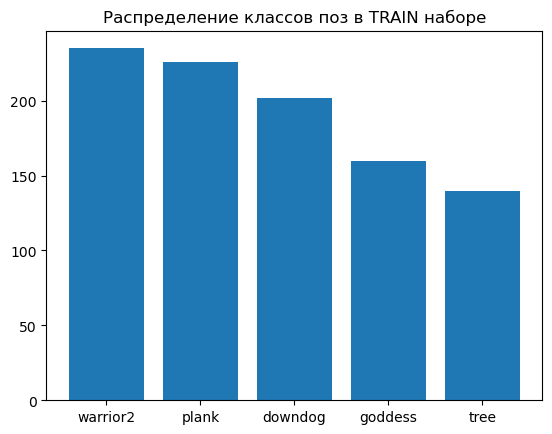

In [176]:
print(data_tr['target'].value_counts())
paint_bar(data_tr, 'TRAIN')
# Отображение гистограммы
plt.show()

In [177]:
# Построение датафрейма скелетных моделей тестового набора
time_start = time.time()
count_files, data_te = create_df_pos(path_test, 'dataset_test_mediapipe_short.csv', full = False)
time_end = time.time()
print('time: ',time_end-time_start)
print(count_files)
data_te.head()

DATASET/TEST//downdog/00000026.jpg
DATASET/TEST//downdog/00000049.jpg
DATASET/TEST//downdog/00000080.jpg
DATASET/TEST//downdog/00000101.jpg
DATASET/TEST//downdog/00000106.jpg
DATASET/TEST//downdog/00000120.jpg
DATASET/TEST//goddess/00000009.jpg
DATASET/TEST//goddess/00000042.jpg
DATASET/TEST//goddess/00000085.jpg
DATASET/TEST//goddess/00000087.jpg
DATASET/TEST//plank/00000002.jpg
DATASET/TEST//plank/00000005.jpg
DATASET/TEST//plank/00000016.jpg
DATASET/TEST//plank/00000021.jpg
DATASET/TEST//plank/00000033.jpg
DATASET/TEST//plank/00000055.jpg
DATASET/TEST//plank/00000061.jpg
DATASET/TEST//plank/00000073.jpg
DATASET/TEST//plank/00000088.jpg
DATASET/TEST//plank/00000095.jpg
DATASET/TEST//plank/00000104.jpg
DATASET/TEST//plank/00000116.png
DATASET/TEST//plank/00000118.jpg
DATASET/TEST//tree/00000003.jpg
DATASET/TEST//tree/00000014.jpg
DATASET/TEST//tree/00000027.jpg
DATASET/TEST//tree/00000033.jpg
DATASET/TEST//tree/00000039.jpg
DATASET/TEST//tree/00000043.jpg
DATASET/TEST//tree/00000059.j

,FileName,Nose_x,Nose_y,LeftEyeInnerCorner_x,LeftEyeInnerCorner_y,LeftEye_x,LeftEye_y,LefEyeOuterCorner_x,LefEyeOuterCorner_y,RightEyeInnerCorner_x,...,RightAnkle_y,LeftHeel_x,LeftHeel_y,RightHeel_x,RightHeel_y,TheIndexFingerOfTheLeftFoot_x,TheIndexFingerOfTheLeftFoot_y,TheIndexFingerOfTheRightFoot_x,TheIndexFingerOfTheRightFoot_y,target
0,DATASET/TEST/downdog/00000000.jpg,0.512550,0.722708,0.495712,0.747380,0.492177,0.746861,0.488492,0.746089,0.496406,...,0.832070,0.898675,0.894080,0.878793,0.880343,0.789113,0.921609,0.776120,0.907029,downdog
1,DATASET/TEST/downdog/00000001.JPG,0.431935,0.559959,0.453727,0.544121,0.457407,0.549795,0.461274,0.554931,0.441749,...,0.806151,0.658572,0.825919,0.242158,0.823510,0.667946,0.867770,0.279406,0.873129,downdog
2,DATASET/TEST/downdog/00000002.jpg,0.438058,0.418089,0.453441,0.415433,0.457662,0.418816,0.462106,0.421662,0.442497,...,0.718771,0.782984,0.913589,0.138420,0.737453,0.853343,0.971719,0.105817,0.816649,downdog
3,DATASET/TEST/downdog/00000003.jpg,0.547532,0.670169,0.571839,0.679890,0.573218,0.678671,0.573870,0.676526,0.562589,...,0.753658,0.559725,0.795829,0.215507,0.767795,0.760529,0.841517,0.204716,0.843871,downdog
4,DATASET/TEST/downdog/00000004.jpg,0.366299,0.728620,0.344064,0.739882,0.341251,0.737733,0.338217,0.735286,0.343358,...,0.753702,0.880151,0.800506,0.822509,0.786313,0.773525,0.916127,0.692009,0.888442,downdog


<class 'pandas.core.frame.DataFrame'>
Index: 435 entries, 0 to 434
Data columns (total 68 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   FileName                        435 non-null    object 
 1   Nose_x                          435 non-null    float64
 2   Nose_y                          435 non-null    float64
 3   LeftEyeInnerCorner_x            435 non-null    float64
 4   LeftEyeInnerCorner_y            435 non-null    float64
 5   LeftEye_x                       435 non-null    float64
 6   LeftEye_y                       435 non-null    float64
 7   LefEyeOuterCorner_x             435 non-null    float64
 8   LefEyeOuterCorner_y             435 non-null    float64
 9   RightEyeInnerCorner_x           435 non-null    float64
 10  RightEyeInnerCorner_y           435 non-null    float64
 11  RightEye_x                      435 non-null    float64
 12  RightEye_y                      435 non-n

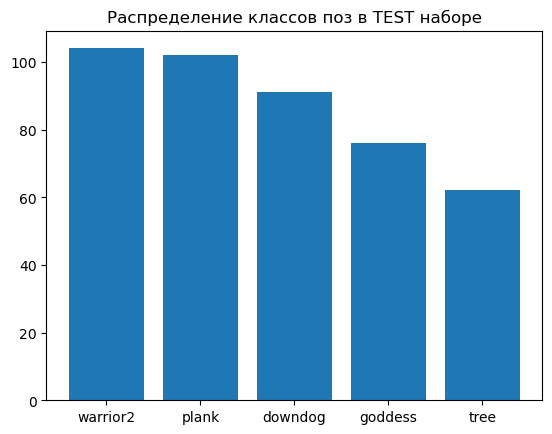

In [178]:
# Вывод характеристик датафрейма скелетных моделей тестового набора
print(data_te.info())
print(data_te['target'].value_counts())
paint_bar(data_te, 'TEST')
# Отображение гистограммы
plt.show()